In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_scheduler.utils as utils
from rubin_scheduler.data import get_baseline

In [2]:
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 1964 bins, returning 200
  warnings.warn(


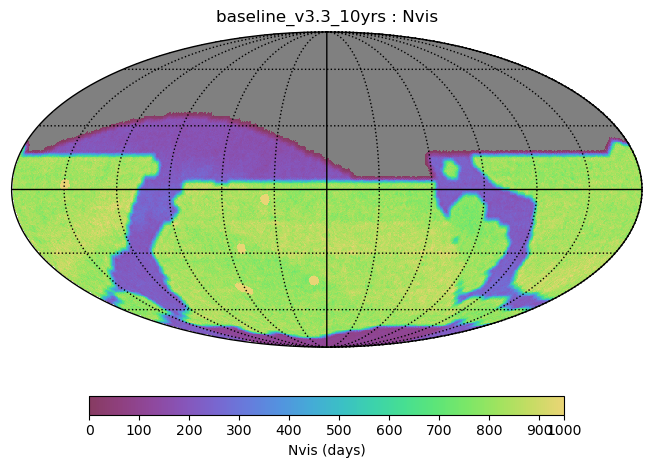

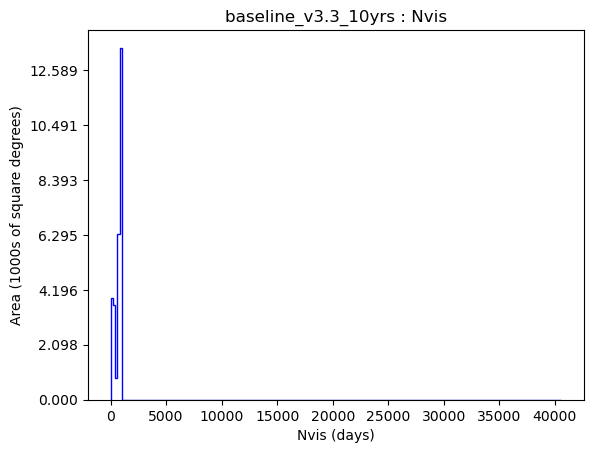

In [3]:
bundle_list = []
nside = 128

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = ''
slicer = maf.slicers.HealpixSlicer(nside=nside)
plot_dict = {'color_max': 950}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)



/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


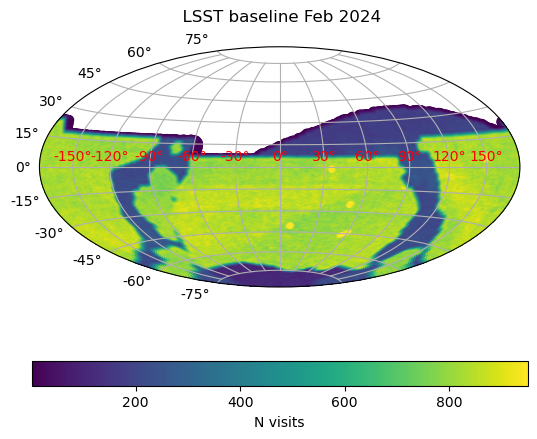

In [4]:
ra, dec = utils.hpid2_ra_dec(nside, np.arange(hp.nside2npix(nside)))
mv = bundle_list[0].metric_values

levels = np.arange(0,950, 5)

fig = plt.figure()
ax = plt.subplot(projection="hammer")
ax.set_title("  LSST baseline Feb 2024 \n")
ax.grid()

x = np.radians(ra)
ind = np.where(x > np.pi)[0]
x[ind] = x[ind] -2* np.pi

scatter = ax.scatter(x, np.radians(dec), c=mv, vmax=950)

cb = plt.colorbar(scatter, orientation="horizontal", pad=0.2)
cb.set_label('N visits')
old = ax.xaxis.get_majorticklabels()
for txt in old:
    txt.set_color("red")


